# Collecting the data for analysis

In [121]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import ace_tools_open as tools # for data frame visualisation
import re # for regular expressions 

## Data source
A dataset collected by scraping Amazon UK in 2023. Contains product prices and features for price prediction tasks.

CSV file is collected from [URL](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction?resource=download) and stored in the project repository.

In [7]:
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df = data.copy()
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
tools.display_dataframe_to_user(name='Amazon UK Price Prediction Dataset', dataframe=df)

Amazon UK Price Prediction Dataset


# Initial Exploration

In [28]:
df.shape

(2443651, 9)

In [29]:
df.columns.tolist()

['uid',
 'asin',
 'title',
 'stars',
 'reviews',
 'price',
 'isBestSeller',
 'boughtInLastMonth',
 'category']

In [30]:
#  rename columns from cale case to snake case
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in df.columns]
df.columns.tolist()

['uid',
 'asin',
 'title',
 'stars',
 'reviews',
 'price',
 'is_best_seller',
 'bought_in_last_month',
 'category']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   uid                   int64  
 1   asin                  object 
 2   title                 object 
 3   stars                 float64
 4   reviews               int64  
 5   price                 float64
 6   is_best_seller        bool   
 7   bought_in_last_month  int64  
 8   category              object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


## Data clean up and data quality assessment

In [32]:
# checking for empty cells
df.isnull().sum()
# equivalent:
# df.isna().sum()

uid                     0
asin                    0
title                   0
stars                   0
reviews                 0
price                   0
is_best_seller          0
bought_in_last_month    0
category                0
dtype: int64

In [33]:
# streating spaces as empty
df.eq(" ").sum()

uid                     0
asin                    0
title                   0
stars                   0
reviews                 0
price                   0
is_best_seller          0
bought_in_last_month    0
category                0
dtype: int64

In [34]:
# chechking for duplicates
print(df.duplicated().sum())

0


## Explore numerical data

In [35]:
# keys stats for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
bought_in_last_month,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


In [39]:
# numerical data column names 
df.describe().columns.tolist()

['uid', 'stars', 'reviews', 'price', 'bought_in_last_month']

In [38]:
num = df.select_dtypes(include="number")
num.head(3)

,uid,stars,reviews,price,bought_in_last_month
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0


In [45]:
for col in num.columns:
    print(f'Column "{col}" has {df[col].nunique()} unique values.')

Column "uid" has 2443651 unique values.
Column "stars" has 42 unique values.
Column "reviews" has 19446 unique values.
Column "price" has 82916 unique values.
Column "bought_in_last_month" has 25 unique values.


The amount of unique values for each numerical data column is too high to analyses values in detail.

## Explore categorical data

In [46]:
cat = df.select_dtypes(exclude="number")
cat

,asin,title,is_best_seller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers
...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",False,Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,False,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,False,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,False,Motorbike Clothing


#### Observations
- All categorical data are nominal, they can not be ranked.
- The column 'is_best_seller' contains boolean values, that means it is a flag for presense or absence of a charectiristic "Best Seller". It is not a characteristic pof the product, but of the advertisement from which product information was scrapped during the data collection process.

In [48]:
for col in cat.columns:
    print(f'Column "{col}" has {df[col].nunique()} unique values.')

Column "asin" has 2222742 unique values.
Column "title" has 2077591 unique values.
Column "is_best_seller" has 2 unique values.
Column "category" has 296 unique values.


# Part 1: Understanding Product Categories
## Business Question: 
### What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### 1. Frequency Tables
#### Generate a frequency table for the product `category`

In [59]:
print(f"There are {df['category'].nunique()} categories of products presented in the given dataset.")

There are 296 categories of products presented in the given dataset.


In [100]:
df_freq_cagtegories = df['category'].value_counts(normalize=False).reset_index()
df_freq_cagtegories.columns = ['category', 'count']
df_freq_cagtegories['percentage'] = round((df_freq_cagtegories['count'] / df_freq_cagtegories['count'].sum()) * 100, 2)

In [101]:
title = "Categories are listed by the frequency of occurances in the descending order."
tools.display_dataframe_to_user(name=title, dataframe=df_freq_cagtegories)

Categories are listed by the frequency of occurances in the descending order.


In [76]:
print(f'The most popular category is "{df_freq_cagtegories.head(1).category.values[0]}" \
with {df_freq_cagtegories.head(1).percentage.values[0]}% of occurances.')

The most popular category is "Sports & Outdoors" with 34.22% of occurances.


#### Which are the top 5 most listed product categories?

In [79]:
df_freq_cagtegories.head(5).category

0                         Sports & Outdoors
1                                    Beauty
2    Handmade Clothing, Shoes & Accessories
3                               Bath & Body
4                            Birthday Gifts
Name: category, dtype: object

### 2. Visualizations
#### Display the distribution of products across different categories using a bar chart.

In [90]:
rows = df.shape[0]
product_count =df['title'].nunique()
print(f"There are {product_count} unique titles out of {rows} data entries. \
That means some products were listed several times.\n\
Therefore we should count products in each category by unique titles.")

There are 2077591 unique titles out of 2443651 data entries. That means some products were listed several times.
Therefore we should count products in each category by unique titles.


In [113]:
# Count unique products per category
category_counts = df.groupby('category')['title'].nunique().reset_index()
category_counts.columns = ['category', 'count']
category_counts.sort_values('count', ascending=False, inplace=True)
category_counts

,category,count
262,Sports & Outdoors,730712
20,Beauty,19254
16,Bath & Body,19027
177,Manicure & Pedicure Products,18817
251,Skin Care,18716
...,...,...
195,Motorbike Chassis,107
6,Alexa Built-In Devices,107
226,Plugs,106
254,Smart Home Security & Lighting,102


In [106]:
total_products = category_counts['count'].sum()
category_counts['percentage'] = (category_counts['count'] / total_products) * 100
category_counts = category_counts.sort_values(by='count', ascending=False)
significant_categories = category_counts[category_counts['percentage'] >= 1]
other_count = category_counts[category_counts['percentage'] < 1]['count'].sum()
other_percentage = (other_count / total_products) * 100
final_data = pd.concat([significant_categories, pd.DataFrame({'category': ['Other'], 'count': [other_count], 'percentage': [other_percentage]})])

In [109]:
tools.display_dataframe_to_user(name="Category Distribution Data", dataframe=final_data)

Category Distribution Data


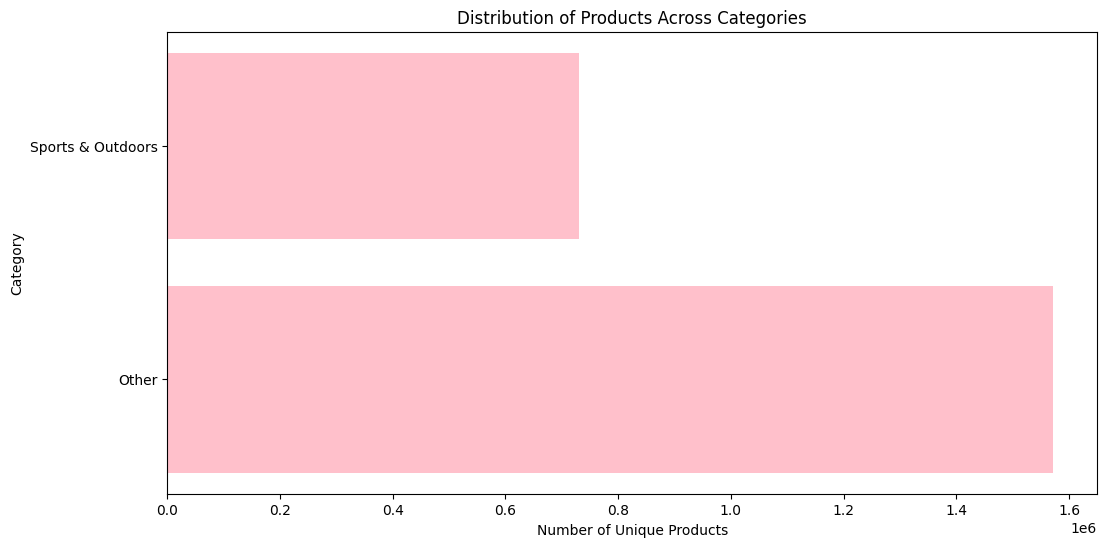

In [111]:
# building charts
plt.figure(figsize=(12, 6))
plt.barh(final_data['category'], final_data['count'], color='pink')
plt.xlabel("Number of Unique Products")
plt.ylabel("Category")
plt.title("Distribution of Products Across Categories")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [140]:
#  Displaying all the other categories in small portions for visibility
other_categories = category_counts.drop(index=category_counts.index[0]).reset_index(drop=True)
other_categories.head(10)

,category,count
0,Beauty,19254
1,Bath & Body,19027
2,Manicure & Pedicure Products,18817
3,Skin Care,18716
4,Make-up,18676
5,Hair Care,18671
6,Fragrances,18422
7,Birthday Gifts,18419
8,Luggage and travel gear,17948
9,"Handmade Clothing, Shoes & Accessories",17897


:



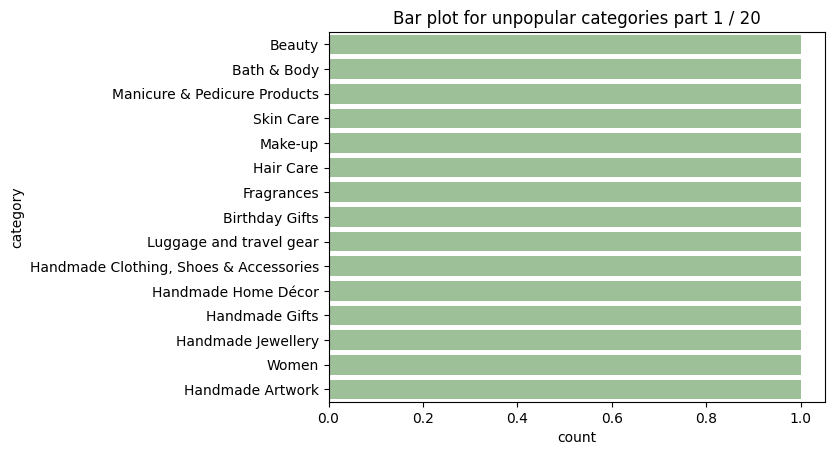

:



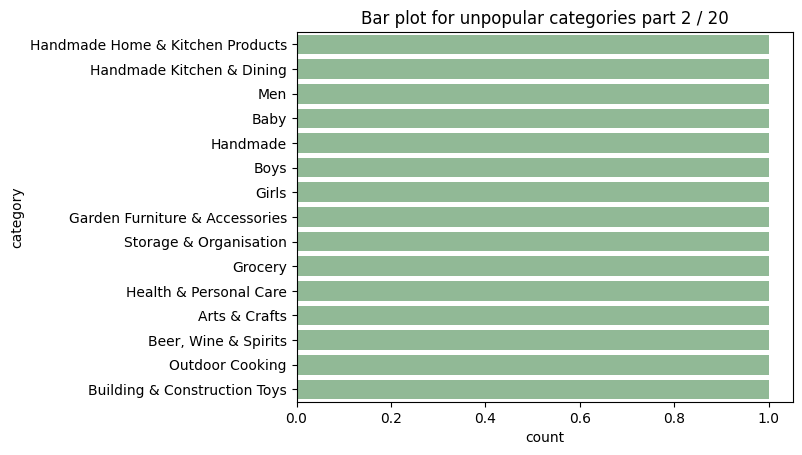

:



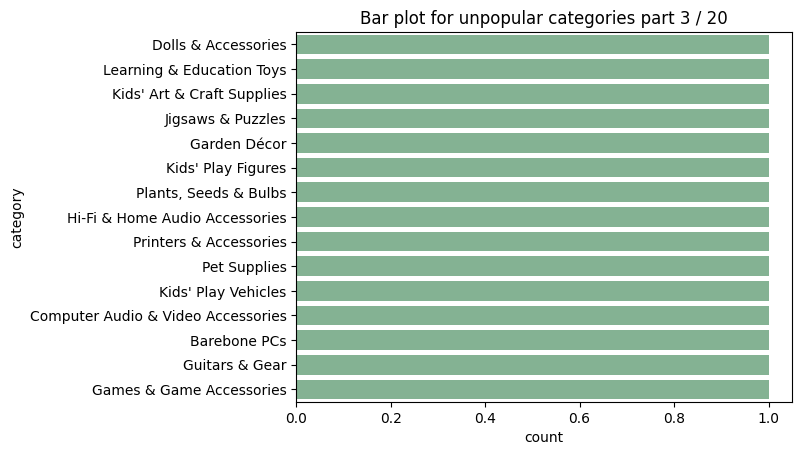

:



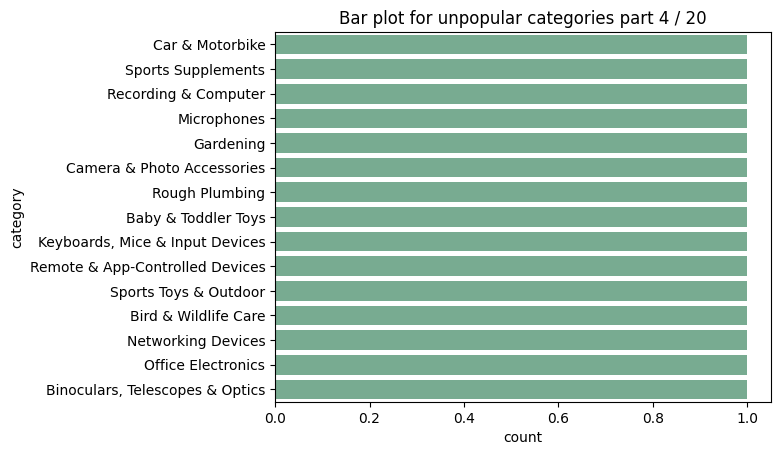

:



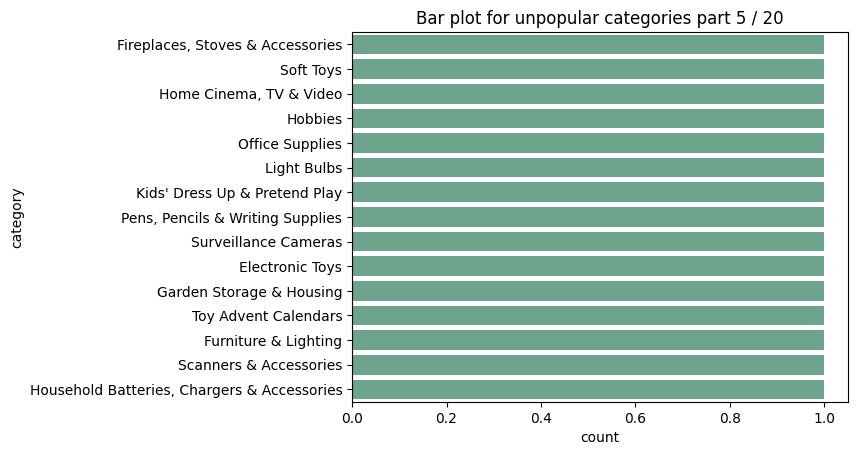

:



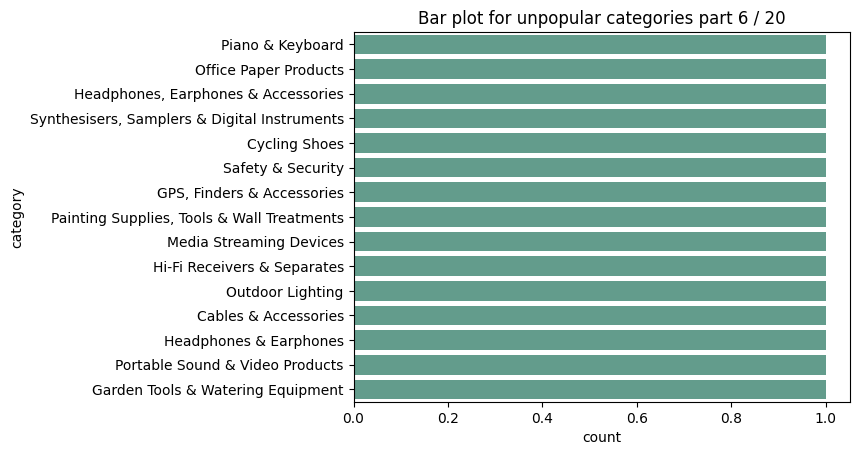

:



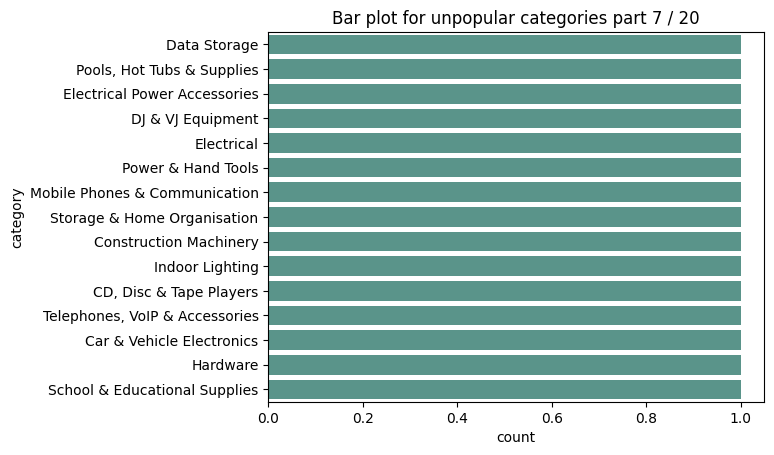

:



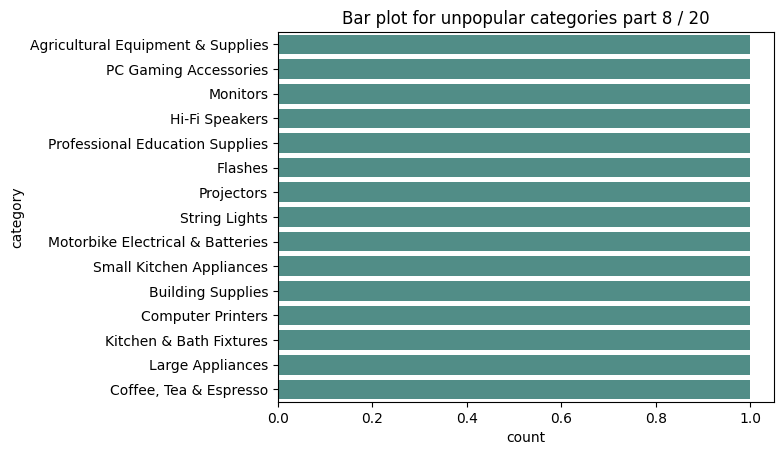

:



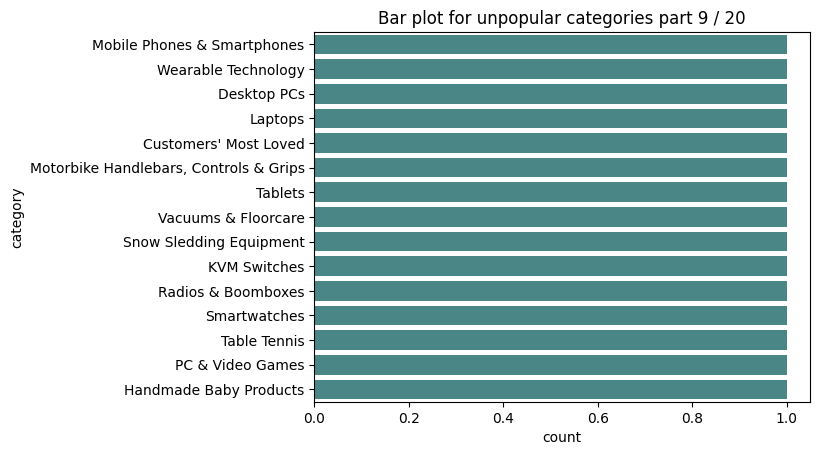

:



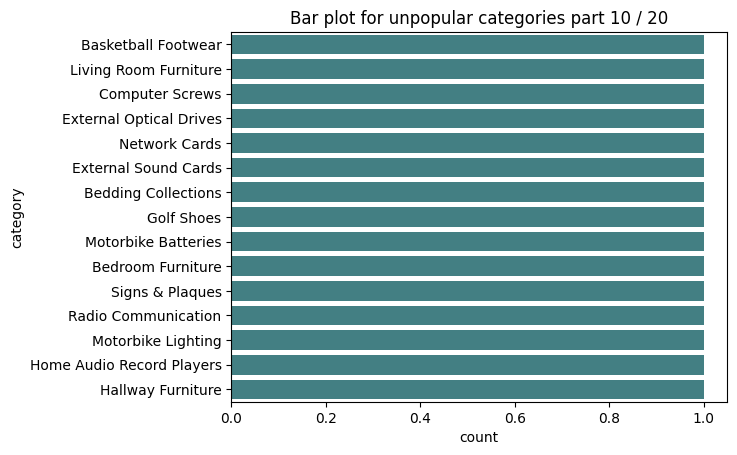

:



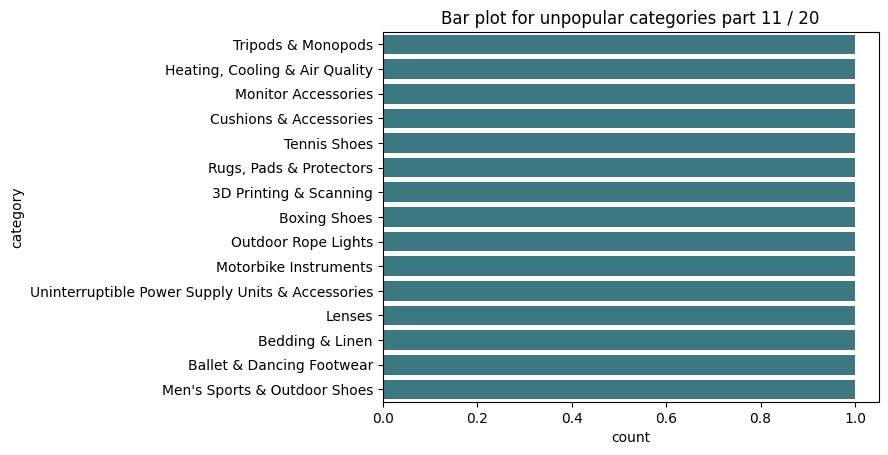

:



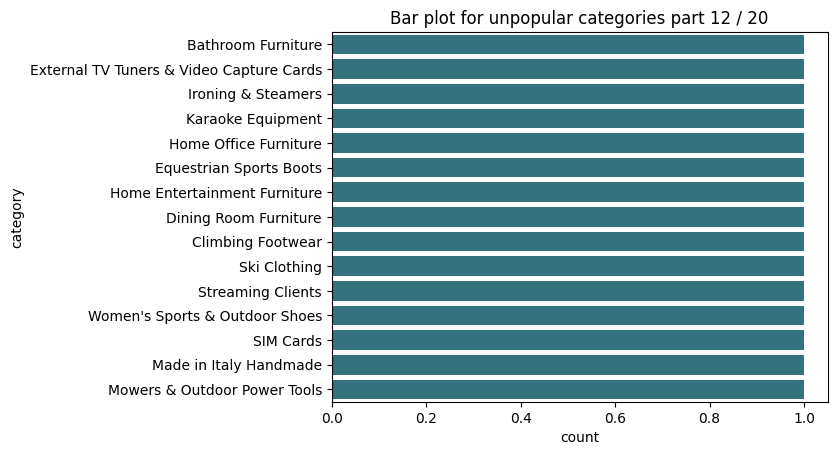

:



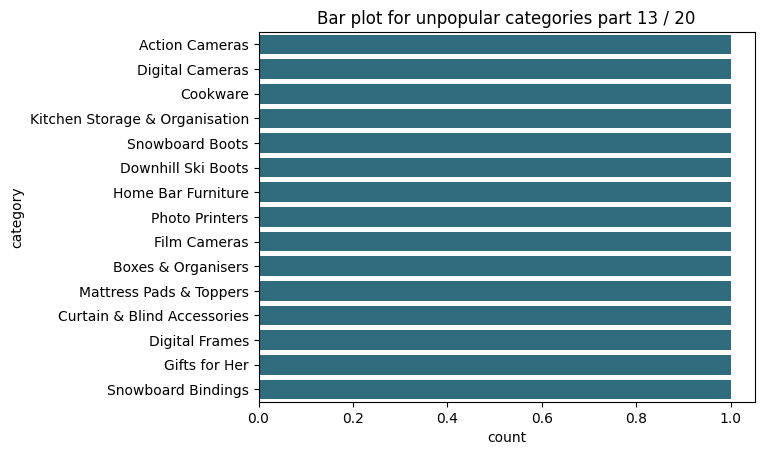

:



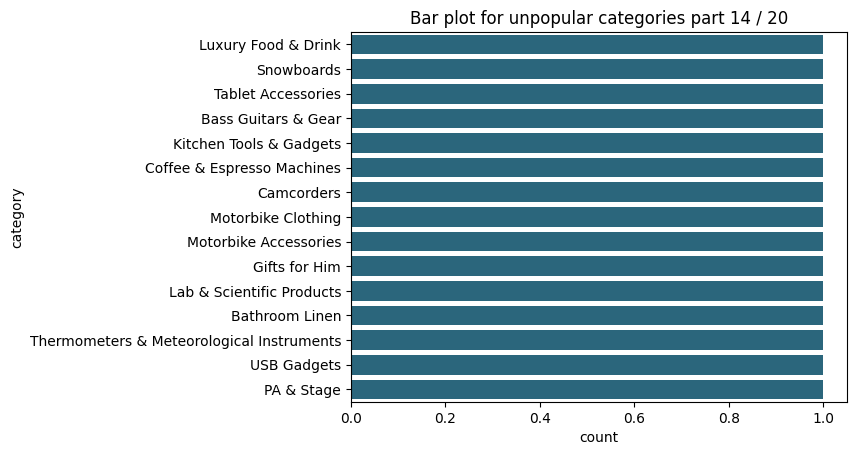

:



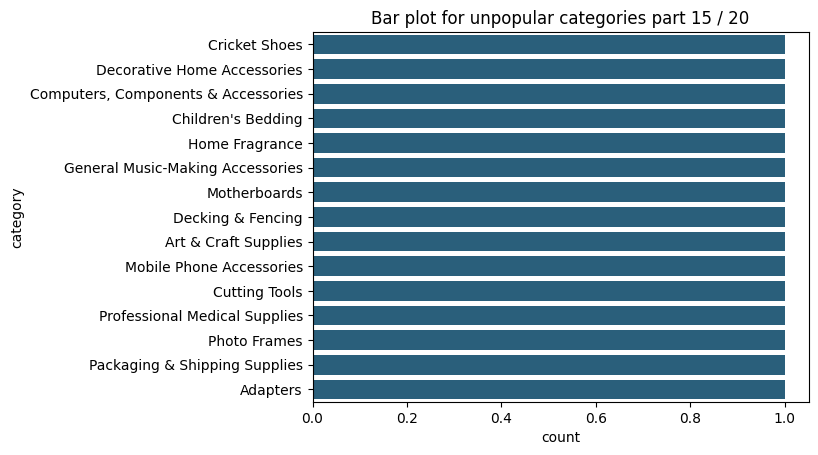

:



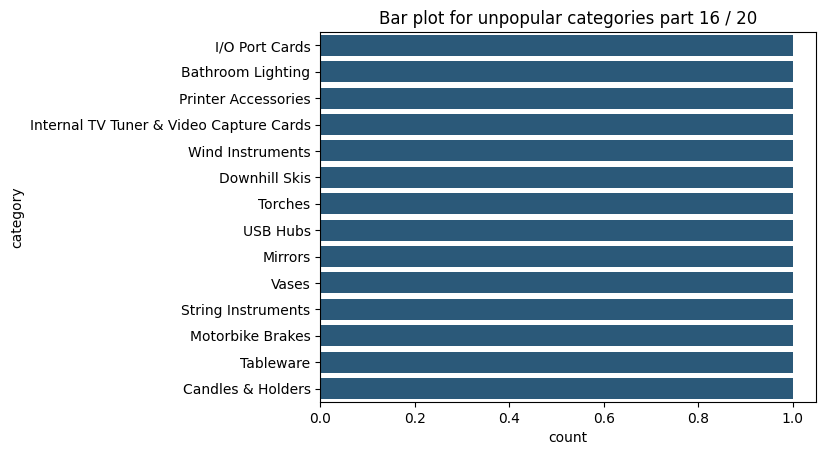

:



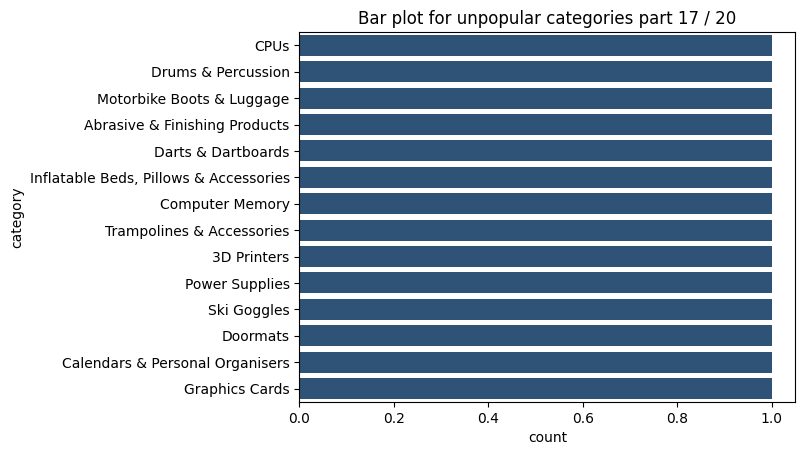

:



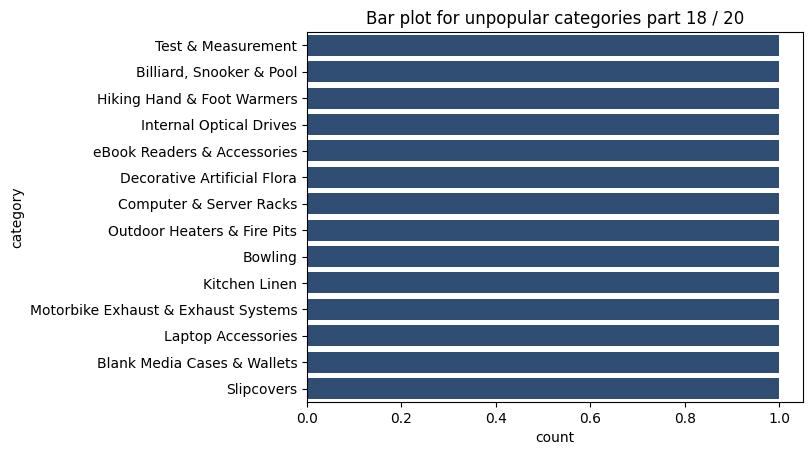

:



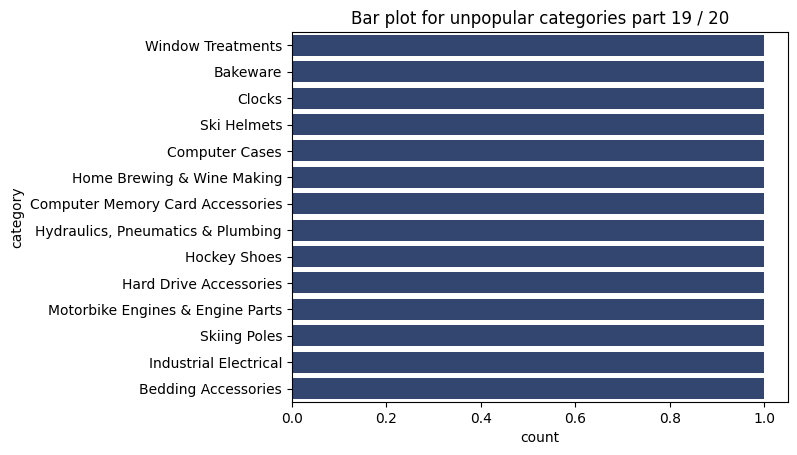

:



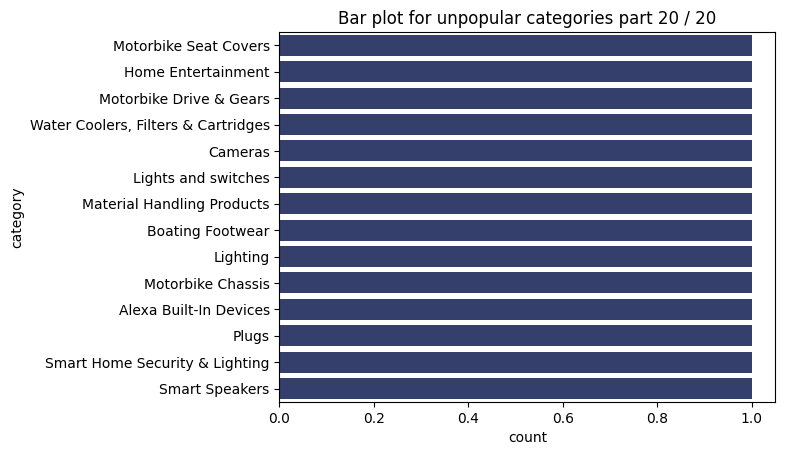

In [149]:
# make 3 data chunks
num_parts = 20
chunk_size = len(other_categories) // num_parts
remainder = len(other_categories) % num_parts

# Generate the portions
start = 0
df_parts = []
for i in range(num_parts):
    end = start + chunk_size + (1 if remainder > 0 else 0)  # Distribute remainder across portions
    df_parts.append(other_categories.iloc[start:end])
    remainder -= 1 if remainder > 0 else 0
    start = end

# choose plot colors
colors = sns.color_palette(palette='crest', n_colors=num_parts)

# for i, part in enumerate(df_parts):
#     print(part)


for i, part in enumerate(df_parts):
    print(f":\n")
    plt.figure()
    sns.countplot(y='category', data=part, color=colors[i])
    plt.title(f'Bar plot for unpopular categories part {i+1} / {num_parts}')
    plt.show()

#### For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

# Part 2: Delving into Product Pricing
## Business Question:
### How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1. Measures of Centrality:
#### Calculate the mean, median, and mode for the `price` of products.

#### What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [ ]:
### 2. Measures of Dispersion:
#### Determine the variance, standard deviation, range, and interquartile range for product `price`.

### 2. Measures of Dispersion:
#### Determine the variance, standard deviation, range, and interquartile range for product `price`.

#### How varied are the product prices? Are there any indicators of a significant spread in prices?

### 3. Visualizations:
#### Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices.

In [ ]:
# If its hard to read these diagrams, think why this is, and explain how it could be solved.


#### Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

# Part 3: Unpacking Product Ratings
## Business Question:
### How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

### 1. Measures of Centrality:
#### Calculate the mean, median, and mode for the `rating` of products.

#### How do customers generally rate products? Is there a common trend?

### 2. Measures of Dispersion:
#### Determine the variance, standard deviation, and interquartile range for product `rating`.

#### Are the ratings consistent, or is there a wide variation in customer feedback?


### 3. Shape of the Distribution:
#### Calculate the skewness and kurtosis for the `rating` column.

#### Are the ratings normally distributed, or do they lean towards higher or lower values?

### 4. Visualizations:
#### Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?